# 2D Poisson problem with TV denoising using MYULA (Part 2)

This script builds on the script provide code for section 5.2.4 figure 12 and 13 of the paper. The goal is to infer log conductivity 𝜿 from measurements of potential u everywhere. The forward model is governed by the Possion equation with zero Dirichlet boundary conditions.

$$ \nabla \cdot \left( e^{\kappa(x_1, x_2)} \nabla u(x_1, x_2)\right ) = f(x_1, x_2) \;\; \text{ in } \;\;\Omega = (0,1)^2 $$

We use MYULA and TV denoising. For more details about the problem setup, please refer to the paper.

Additional resources for solving Poisson problem using CUQIpy-FEniCS:
- [CUQI book](https://cuqi-dtu.github.io/CUQI-Book/chapter04/Plugins/CUQIpy-FEniCS/poisson_2D_fenics.html)
- [Documentation](https://cuqi-dtu.github.io/CUQIpy-FEniCS/api/_autosummary/cuqipy_fenics.testproblem/cuqipy_fenics.testproblem.FEniCSPoisson2D.html#cuqipy_fenics.testproblem.FEniCSPoisson2D)
- [CUQIpy paper part II](https://arxiv.org/abs/2305.16951)



### Imports

In [7]:

from cuqipy_fenics.testproblem import FEniCSPoisson2D
from cuqi.samples import Samples
import numpy as np
import cuqi
import cuqipy_fenics
import dolfin as dl
import matplotlib.pyplot as plt
import os

# set logging level of dl
dl.set_log_level(dl.LogLevel.ERROR)

### Print CUQIpy and CUQIpy-FEniCS versions:

In [2]:
print(cuqi.__version__)
print(cuqipy_fenics.__version__)

0+untagged.4264.g1312577
0+untagged.290.gafe09a4


### Parameters

In [3]:
# Set random seed for reproducibility
np.random.seed(0)

Ns = 10 # Number of samples
Nt= 2 # Thinning, take every Nt sample
Nb = 10 # Number of burn-in samples

noise_level = 0.01 # Level of noise in data

TV_weight_factor = 10
nx = 32 # (For nx by nx mesh)
sample_batches = True # Sample in batches to save memory

### Tag (used for file names, etc)

In [4]:
expr_tag = f"_nx_{nx}_rest_str_{TV_weight_factor}_Ns_{Ns}"
print(expr_tag)

_nx_32_rest_str_10_Ns_10


### Forward model

We use a CUQIpy-FEniCS test problem for the forward model.

In [5]:
A = FEniCSPoisson2D(dim=(nx,nx),
                    field_type=None,
                    mapping='exponential', # to infer log-conductivity
                    bc_types=['Dirichlet', 'Dirichlet', 'Dirichlet', 'Dirichlet']).model

In [8]:
# Read all the cases for reg strength 
dir = "../results_nov22/"
file_list = [
"posterior_samples_2D_nx_32_rest_str_1.0_Ns_500000.npz",
"posterior_samples_2D_nx_32_rest_str_5.0_Ns_500000.npz",
"posterior_samples_2D_nx_32_rest_str_7.0_Ns_500000.npz",
"posterior_samples_2D_nx_32_rest_str_10.0_Ns_500000.npz",
"posterior_samples_2D_nx_32_rest_str_20.0_Ns_500000.npz",
"posterior_samples_2D_nx_32_rest_str_30.0_Ns_500000.npz"]

rest_str_factor = [1.0, 5.0, 7.0, 10.0, 20.0, 30.0]

data_list = []

for file in file_list:
    data = np.load(dir+file)
    data_list.append(Samples(data['samples'], geometry=A.domain_geometry))

#posterior_samples_2D_nx_32_rest_str_50.0_Ns_500000.npz
#posterior_samples_2D_nx_32_rest_str_60.0_Ns_500000.npz

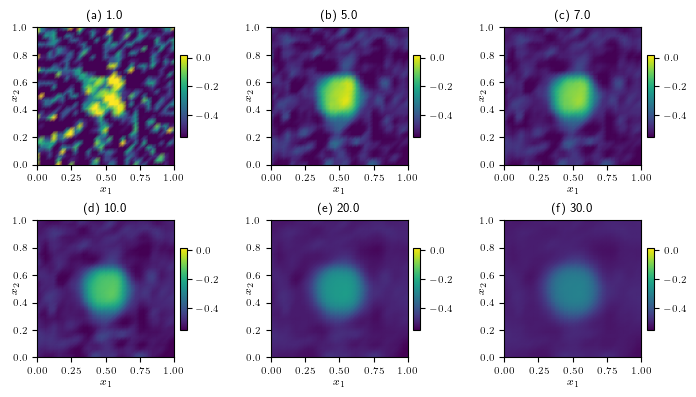

In [9]:

physical_dim = 2
if True:

    import os
    from matplotlib import ticker
    import matplotlib.pyplot as plt
    
    # Set up matplotlib
    SMALL_SIZE = 7
    MEDIUM_SIZE = 8
    BIGGER_SIZE = 9
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    # Use latex package
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{bm}')
    
    # Data directory
    fig_dir = './figs/'
    
    # Figure file
    fig_dir = fig_dir 
    
    # Check if the directory exists
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    
    # Figure version
    version = 'v8'
    
    # Figure file
    fig_file = fig_dir + 'paper_figure2_'+version+'.pdf'
    
    # Create the figure
    cm_to_in = 1/2.54
    fig, axs = plt.subplots(nrows=2, ncols=3,
                            figsize=(17.8*cm_to_in, 9.8*cm_to_in),
                            layout="constrained")
    
    # Define the colors to be used in the plots
    colors = ['C0', 'green', 'purple', 'k', 'gray']
    
    # (a)
    plt.sca(axs[0,0])
    


    if physical_dim == 2:
        im = data_list[0].plot_mean(
            subplots=False, vmin=-0.55, vmax=0.02, mode='color')
        inset_axes = plt.gca().inset_axes([1.04, 0.2, 0.05, 0.6])
        fig.colorbar(im[0], ax=plt.gca(), cax=inset_axes)
        plt.gca().set_ylim(0, 1)
        plt.ylabel('$x_2$')
        plt.gca().yaxis.labelpad = -5
    else:
        im = posterior_samples.plot_mean(subplots=False)
    
    plt.gca().set_xlim(0, 1)
    plt.xlabel('$x_1$')
    plt.gca().xaxis.labelpad = 1
    plt.gca().set_title('(a) '+str(rest_str_factor[0]))
    
    # (b)
    plt.sca(axs[0,1])


    if physical_dim == 2:
        im = data_list[1].plot_mean(
            subplots=False, vmin=-0.55, vmax=0.02, mode='color')
        inset_axes = plt.gca().inset_axes([1.04, 0.2, 0.05, 0.6])
        fig.colorbar(im[0], ax=plt.gca(), cax=inset_axes)
        plt.gca().set_ylim(0, 1)
        plt.ylabel('$x_2$')
        plt.gca().yaxis.labelpad = -5
    else:
        im = posterior_samples.plot_mean(subplots=False)
    
    plt.gca().set_xlim(0, 1)
    plt.xlabel('$x_1$')
    plt.gca().xaxis.labelpad = 1
    plt.gca().set_title('(b) '+str(rest_str_factor[1]))
    
    
    # (c)
    plt.sca(axs[0,2])


    if physical_dim == 2:
        im = data_list[2].plot_mean(
            subplots=False, vmin=-0.55, vmax=0.02, mode='color')
        inset_axes = plt.gca().inset_axes([1.04, 0.2, 0.05, 0.6])
        fig.colorbar(im[0], ax=plt.gca(), cax=inset_axes)
        plt.gca().set_ylim(0, 1)
        plt.ylabel('$x_2$')
        plt.gca().yaxis.labelpad = -5
    else:
        im = posterior_samples.plot_mean(subplots=False)
    
    plt.gca().set_xlim(0, 1)
    plt.xlabel('$x_1$')
    plt.gca().xaxis.labelpad = 1
    plt.gca().set_title('(c) '+str(rest_str_factor[2]))
    
    # (d)
    plt.sca(axs[1,0])

    if physical_dim == 2:
        im = data_list[3].plot_mean(
            subplots=False, vmin=-0.55, vmax=0.02, mode='color')
        inset_axes = plt.gca().inset_axes([1.04, 0.2, 0.05, 0.6])
        fig.colorbar(im[0], ax=plt.gca(), cax=inset_axes)
        plt.gca().set_ylim(0, 1)
        plt.ylabel('$x_2$')
        plt.gca().yaxis.labelpad = -5
    else:
        im = posterior_samples.plot_mean(subplots=False)
    
    plt.gca().set_xlim(0, 1)
    plt.xlabel('$x_1$')
    plt.gca().xaxis.labelpad = 1
    plt.gca().set_title('(d) '+str(rest_str_factor[3]))
    
    # (e)
    plt.sca(axs[1,1])

    if physical_dim == 2:
        im = data_list[4].plot_mean(
            subplots=False, vmin=-0.55, vmax=0.02, mode='color')
        inset_axes = plt.gca().inset_axes([1.04, 0.2, 0.05, 0.6])
        fig.colorbar(im[0], ax=plt.gca(), cax=inset_axes)
        plt.gca().set_ylim(0, 1)
        plt.ylabel('$x_2$')
        plt.gca().yaxis.labelpad = -5
    else:
        im = posterior_samples.plot_mean(subplots=False)
    
    plt.gca().set_xlim(0, 1)
    plt.xlabel('$x_1$')
    plt.gca().xaxis.labelpad = 1
    plt.gca().set_title('(e) '+str(rest_str_factor[4]))
    
    # (f)
    plt.sca(axs[1,2])

    if physical_dim == 2:
        im = data_list[5].plot_mean(
            subplots=False, vmin=-0.55, vmax=0.02, mode='color')
        inset_axes = plt.gca().inset_axes([1.04, 0.2, 0.05, 0.6])
        fig.colorbar(im[0], ax=plt.gca(), cax=inset_axes)
        plt.gca().set_ylim(0, 1)
        plt.ylabel('$x_2$')
        plt.gca().yaxis.labelpad = -5
    else:
        im = posterior_samples.plot_mean(subplots=False)
    
    plt.gca().set_xlim(0, 1)
    plt.xlabel('$x_1$')
    plt.gca().xaxis.labelpad = 1
    plt.gca().set_title('(f) '+str(rest_str_factor[5]))


    # Save the figure
    plt.savefig(fig_file, bbox_inches='tight', pad_inches=0.01, dpi=600)